# Scale Matters
A study into the 'fairness' of scaling large-scale assessments <br>
By: Gerard Barkema, Matthieu Brinkhuis & Berenice Michels

## Simulating a large-scale test
We simulate a test adminstered to *N* students, consisting of *M* items.
The test is meant to measure a latent ability of the students $\theta$ which we assume to be normally distributed around a mean value <$\theta$> with a standard deviation $\sigma_\theta$.
The distribution of the difficulty $\beta$ of the items in the test follows - for now- also a normal distribution, where we can set the mean and standard deviation in comparison to that of the student's ability: $\Delta_\theta$ and $\Delta_\sigma$.

> simulation: change N, M, <$\theta$>, $\sigma_\theta$, $\Delta_\theta$ and $\Delta_\sigma$

---
Cito 2019: <br>
N=87600 <br>
M=160 <br>
*getuned*: <br>
$\sigma_\theta$=0.95 <br>
$\Delta_\theta$=-1.43

In [11]:
import numpy as np                                              # import numerical python
import matplotlib.pyplot as plt                                 # import plot library

# define population_length as array length for population (N) 
# and test_length as array lenght for test (M)
population_length = 87600                                       #N
test_length = 160                                              #M
ability_mean = 0.0                                              # theta_mean
ability_stddev = 0.95                                            # sigma_theta
mean_dif = -1.4                                                  # Delta_theta
stddev_dif = 0.0                                                # Delta_sigma

See the plot for the distribution of the abilities

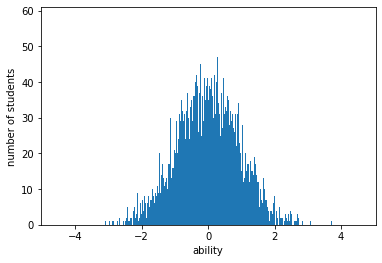

In [12]:
population_array = np.arange(1,population_length+1)             # array with population
ability = np.random.normal(ability_mean, ability_stddev, population_length)
                                                                # array with random normally distributed abilities

plt.hist(ability,bins=int(population_length/10))
plt.xlabel("ability")
plt.ylabel("number of students");

See the plot for the distribution of the difficulties


> simulation: change the distribution function between normal and uniform

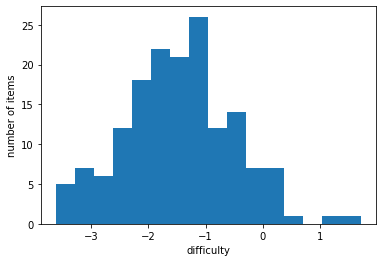

In [13]:
test_array = np.arange(1,test_length+1)                       # array with test items

difficulty_mean = ability_mean + mean_dif                       # calculated mean of difficulties
difficulty_stddev = ability_stddev + stddev_dif                 # calculated standard deviation of difficulties
difficulty = np.random.normal(difficulty_mean, difficulty_stddev, test_length)
                                                              # array with random **normally** distributed difficulties

difficulty_width=2*difficulty_stddev
# difficulty = np.random.uniform(low=difficulty_mean-difficulty_width,high=difficulty_mean+difficulty_width,size=test_length)
                                                              # array with random **uniformly** distributed difficulties
    
plt.hist(difficulty,bins=int(test_length/10))
plt.xlabel("difficulty")
plt.ylabel("number of items");

Now, we simulate the test. 

For this we assume that the probability *P* that student *i*  answers question *k*
correctly (and obtaines a score of 1), is given by the Item Response Function


$$
\\
\begin{equation}
P_{ik}=\frac{\exp((\theta_i-\beta_k)/\alpha)}{1+\exp((\theta_i-\beta_k)/\alpha))}
\end{equation}
%
$$

where $\alpha$ is a constant.

> not yet implemented: change into another IRF

---
Cito 2019: <br>
mean = 120,98 <br>
stddev = 22,83

In [14]:
# define function IRF
def IRF(L,M,theta,beta,alfa):
#    L: integer - population size
#    M: integer - number of test items
#    theta: 2d-array of floats; shape (L,M) - abilities
#    beta = 2d-array of floats; shape (L,M) - difficulties
#    alfa = float - constant
    D = alfa*(theta - beta)
    IRF = np.exp(D)/(1+np.exp(D))
    return(IRF)

> simulation: change alpha

mean score = 120.33  standard deviation = 22.39


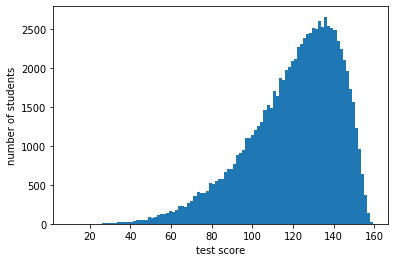

In [15]:
alpha = 1.0

testresult = np.ndarray(shape=(population_length,test_length))
rs_ability = ability.reshape(population_length,1)
rs_difficulty = difficulty.reshape(1,test_length)
testresult=IRF(population_length,test_length,rs_ability,rs_difficulty,alpha)
test_score = np.sum(testresult,axis=1)
plt.hist(test_score,bins=100)
plt.xlabel("test score")
plt.ylabel("number of students");
test_avg=np.average(test_score)
test_mean=np.mean(test_score)
test_std=np.std(test_score)
print("mean score = %.2f  standard deviation = %.2f"%(test_mean,test_std))

Next step: calculate distribution of p-values and compare to results Cito 2019 (if known)